В цьому домашньому завданні ми реалізуємо логістичну регресію на `numpy`.
Ці завдання допоможуть вам ґрунтовно засвоїти основні концепції логістичної регресії та реалізувати їх на практиці 🔥

#### Завдання 1: Реалізація функції сигмоїди
1. З використанням `numpy` напишіть функцію `sigmoid(z)` для обчислення значення сигмоїди згідно з формулою:
   $$
   \sigma(z) = \frac{1}{1 + e^{-z}}
   $$
2. Використовуючи цю функцію, обчисліть значення сигмоїди для наступних даних: $ z = [-2, -1, 0, 1, 2] $. Виведіть результат обчислень.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def sigmoid(z):
    res = 1/(1 + np.exp(-z))
    return res

In [3]:
z = np.array([-2, -1, 0, 1, 2])
display(sigmoid(z))

array([0.11920292, 0.26894142, 0.5       , 0.73105858, 0.88079708])



#### Завдання 2: Реалізація функції гіпотези для логістичної регресії
1. Напишіть функцію `hypothesis(theta, X)`, яка обчислює гіпотезу для логістичної регресії, використовуючи функцію сигмоїди. Формула гіпотези:
   $$
   h_\theta(x) = \sigma(\theta^T x) = \frac{1}{1 + e^{-\theta^T x}}
   $$
2. Використайте функцію `hypothesis` для обчислення значень гіпотези для наступних даних:
   
   $\theta = [0.5, -0.5]$
   
   $X = \begin{bmatrix} 1 & 2 \\ 1 & -1 \\ 1 & 0 \\ 1 & 1 \end{bmatrix}$

  Виведіть результат обчислень.


In [4]:
def hypothesis(theta, X):
    q = np.dot(X, theta)
    res = 1/(1 + np.exp(-q))
    return res

In [5]:
theta = np.array([0.5, -0.5])
X = np.array([[1, 2], [1, -1], [1, 0], [1, 1]])

hypothesis(theta, X)

array([0.37754067, 0.73105858, 0.62245933, 0.5       ])

#### Завдання 3: Реалізація функції для підрахунку градієнтів фукнції втрат
1. Напишіть функцію `compute_gradient(theta, X, y)`, яка обчислює градієнти функції втрат для логістичної регресії. Формула для обчислення градієнта:
   $$
   \frac{\partial L(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^{m} \left[ (h_\theta(x^{(i)}) - y^{(i)}) x_j^{(i)} \right]
   $$
2. Використайте функцію `compute_gradient` для обчислення градієнтів для наступних даних:

  $\theta = [0.5, -0.5]$

  $X = \begin{bmatrix} 1 & 2 \\ 1 & -1 \\ 1 & 0 \\ 1 & 1 \end{bmatrix}$

  $y = [1, 0, 1, 0]$

  Виведіть результат обчислень.

In [6]:
def compute_gradient(theta, X, y):
    m = len(y)
    hyp = hypothesis(theta, X)
    grad = (1/m) * np.dot(X.T, (hyp - y))
    return grad   

In [7]:
theta = np.array([0.5, -0.5])
X = np.array([[1, 2], [1, -1], [1, 0], [1, 1]])
y = np.array([1, 0, 1, 0])

print(compute_gradient(theta, X, y))

[ 0.05776464 -0.36899431]



#### Завдання 4: Реалізація повного батч градієнтного спуску

**Задача:**
1. Напишіть функцію `full_batch_gradient_descent(X, y, lr=0.1, epochs=100)`, яка реалізує алгоритм Full градієнтного спуску для логістичної регресії. Використовуйте такі формули:
   - Гіпотеза: $ h_\theta(x) = \sigma(\theta^T x) $
   - Оновлення параметрів: $ \theta_j := \theta_j - \alpha \frac{\partial L(\theta)}{\partial \theta_j} $
2. Використайте функцію `full_batch_gradient_descent` для обчислення параметрів моделі на наступних даних:

  $X = \begin{bmatrix} 1 & 2 \\ 1 & -1 \\ 1 & 0 \\ 1 & 1 \end{bmatrix}$

  $y = [1, 0, 1, 0]$

  Увага! Матриця $X$ вже має стовпець одиниць і передбачається, що це. - стовпець для intercept - параметра зсуву.

  Виведіть результат обчислень.


In [8]:
def full_batch_gradient_descent(X, y, lr=0.1, epochs=100):
    theta = np.array([0, 0])
    grad = []
    m = y.shape[0]
    costs = []
    grads = []
    for j in range(epochs): 
        hyp= 1/(1 + np.exp(-np.dot(X, theta)))
        grad =  (1/m) * np.dot(X.T, (hyp - y))
        cost = (-1/m) * ((np.dot(y, np.log(hyp)) + (np.dot((1 - y), np.log(1 - hyp)))))
        theta = theta - lr * grad
        costs.append(cost)
    return theta, costs, grads

In [9]:
X = np.array([[1, 2], [1, -1], [1, 0], [1, 1]])
y = np.array([1, 0, 1, 0])
theta, costs, grads = full_batch_gradient_descent(X, y, lr=0.1, epochs=100)
print(theta)

[-0.2893693   0.77655125]


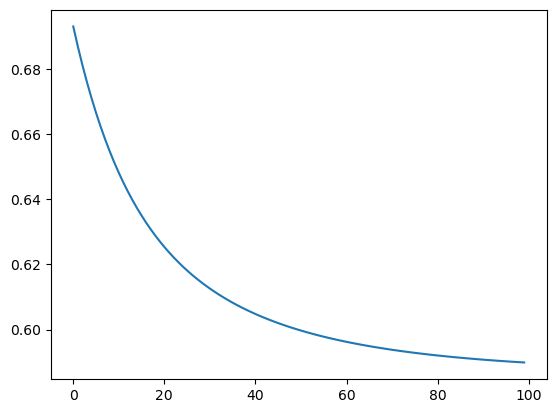

In [10]:
plt.plot(costs)
plt.show()

#### Завдання 5. Обчислення точності моделі

1. Напишіть функцію `predict_proba(theta, X)`, яка використовує знайдені параметри $\theta$ для обчислення ймовірностей належності поточного прикладу з даних до класу $y=1$ на основі значень $\sigma(\theta^T x)$.

2. Напишіть функцію `predict(theta, X, threshold=0.5)`, яка обчислює клас з передбаченої імовірності належності екземпляра до класу 1 з порогом 0.5. Тобто якщо ймовірність менше 0.5, то передбачаємо клас 0, інакше клас 1.

3. Напишіть функцію `accuracy(y_true, y_pred)`, яка обчислює точність моделі, визначивши частку правильно передбачених класів.

  Формула метрики Accuracy:
  $$
  \text{Accuracy} = \frac{\sum_{i=1}^{m} I(\hat{{y}^{(i)}} = y^{(i)})}{m}
  $$

  де $\hat{{y}^{(i)}}$ - передбачене значення класу, $I$ - індикаторна функція (яка дорівнює 1, якщо умова виконується, і 0 - якщо ні), $m$ - кількість прикладів.

4. Обчисліть з використанням даних в завданні 4 $X$, $y$ та обчислених коефіцієнтах $\theta$ та виведіть на екран:
  - передбачені моделлю імовірності належності кожного з екземплярів в матриці `X` до класу 1
  - класи кожного екземпляра з матриці `X`
  - точність моделі.

In [11]:
def predict_proba(theta, X):
    hyp = 1/(1 + np.exp(-np.dot(X, theta)))
    return(hyp)

In [12]:
def predict(theta, X, threshold=0.5):
    res = 1/(1 + np.exp(-np.dot(X, theta)))
    res_class = []
    for i in range(len(res)):        
        if res[i] < 0.5:
            res_class.append(0)
        else:
            res_class.append(1)
    return res_class

In [13]:
def accuracy(y_true, y_pred):
    k = 0
    for i in range(len(y_true)):
        if y_true[i] == y_pred[i]:
            k = k + 1
        accuracy = k/len(y_true)
    return accuracy

In [14]:
pred = predict_proba(theta, X)
print('Імовірністі належності кожного з екземплярів в матриці X до класу 1', pred)

pred_classes = predict(theta, X, threshold=0.5)
print('Kласи кожного екземпляра з матриці X', pred_classes)


y_pred = pred_classes
acc = accuracy(y, y_pred)
print('Точність моделі', acc)

Імовірністі належності кожного з екземплярів в матриці X до класу 1 [0.77966809 0.25617965 0.42815828 0.61944235]
Kласи кожного екземпляра з матриці X [1, 0, 0, 1]
Точність моделі 0.5
